<a href="https://colab.research.google.com/github/OlhaZahrebelna/Analysis_of_social_networks/blob/main/Analysis_of_social_networksUA_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**У цьому аналізі ми досліджуємо взаємодію користувачів з контентом на різних соціальних платформах: YouTube, Facebook, Instagram і TikTok. Дослідження засноване на наборі даних, який містить 10525 записів з інформацією про лайки, коментарі, шари, перегляди та інші метрики. Мета - визначити основні тенденції та взаємозв'язки між цими показниками для різних платформ.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

**Завантажуємо наш набір даних**

In [2]:
file_path = '/content/test_sample (1).csv'

try:
    df = pd.read_csv(file_path, sep=None, engine='python')
    success = True
except Exception as e:
    success = False
    error = str(e)

display(success)
display(error if not success else df.head())

True

,platform,account_id,id,created_time,text_original,text_additional,likes_count,shares_count,comments_count,views_count
0,Instagram,59141296785,C_00PPctR-o,2024-09-12 17:20:36.000000 +00:00,NaN,NaN,222.0,NaN,34.0,NaN
1,Instagram,60554087008,C_00W8KttVv,2024-09-12 17:21:27.000000 +00:00,C’è un gruppo sulla parola di Dio sulla mia ho...,NaN,391.0,NaN,37.0,NaN
2,Instagram,62605500679,C_026U_t3We,2024-09-12 17:43:38.000000 +00:00,𝐒𝐮𝐥 𝐦𝐢𝐨 𝐩𝐫𝐨𝐟𝐢𝐥𝐨 𝐜‘𝐞̀ 𝐮𝐧 𝐠𝐫𝐮𝐩𝐩𝐨 𝐝𝐢 𝐬𝐭𝐮𝐝𝐢𝐨 𝐬𝐮𝐥𝐥𝐚...,NaN,9.0,NaN,3.0,NaN
3,Instagram,58741537308,C_05B3hCYQn,2024-09-12 18:02:08.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,78.0,NaN,15.0,NaN
4,Instagram,58741537308,C_0BfOLiqRS,2024-09-12 09:57:22.000000 +00:00,#Monza\n#Padova\n#Lecce\n#Latina\n#paroladelsi...,NaN,129.0,NaN,16.0,NaN


**Подивімося, які стовпці має наш набір даних**

In [3]:
df.columns

Index(['platform', 'account_id', 'id', 'created_time', 'text_original',
       'text_additional', 'likes_count', 'shares_count', 'comments_count',
       'views_count'],
      dtype='object')

- **platform**: Назва платформи, на якій опубліковано контент (наприклад, YouTube, Facebook, Instagram, TikTok). Ця колонка дозволяє класифікувати записи за платформами та порівнювати активність у різних соціальних мережах.

- **account_id**: Ідентифікатор акаунта користувача, який опублікував контент. Дозволяє відстежувати активність конкретних користувачів та їхній вплив на взаємодію з контентом.

- **id**: Унікальний ідентифікатор публікації або запису в наборі даних. Використовується для однозначної ідентифікації кожного запису.

- **created_time**: Час публікації контенту. Це значення дозволяє аналізувати активність користувачів у різний час доби або у різні дні тижня, а також виявляти сезонні коливання.

- **text_original**: Оригінальний текст публікації. Ця колонка містить текстову частину контенту та може бути корисною для аналізу тематики постів або текстового аналізу.

- **text_additional**: Додатковий текст, який може бути частиною публікації, наприклад, опис або хештеги. Цей текст може бути корисним для розширеного аналізу контенту.

- **likes_count**: Кількість вподобань, які отримав пост. Ця колонка відображає рівень схвалення або популярності контенту серед користувачів.

- **shares_count**: Кількість поширень публікації іншими користувачами. Це свідчить про рівень розповсюдження контенту та його здатність залучати нову аудиторію.

- **comments_count**: Кількість коментарів під постом. Цей показник відображає рівень взаємодії та залученості користувачів у обговорення контенту.

- **views_count**: Кількість переглядів публікації. Це кількість разів, коли було переглянуто контент, і цей показник допомагає оцінити охоплення аудиторії.

**Переглянемо, який розмір має набір даних**

In [4]:
df.shape

(10525, 10)

Дані мають форму (10525, 10), що означає наявність 10 стовпців та 10 525 рядків у наборі даних. Це надає велику кількість записів для аналізу, зокрема для вивчення взаємозв’язків між різними метриками, такими як кількість вподобань, коментарів, поширень і переглядів.



**Виведемо інформацію про DataFrame. Ця інформація містить кількість стовпців, назви стовпців, типи даних у стовпцях, використання памʼяті, діапазон індексів, а також кількість непорожніх значень у кожному стовпці.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10525 entries, 0 to 10524
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10525 non-null  object 
 1   account_id       10000 non-null  object 
 2   id               10047 non-null  object 
 3   created_time     10000 non-null  object 
 4   text_original    7660 non-null   object 
 5   text_additional  3 non-null      object 
 6   likes_count      9951 non-null   float64
 7   shares_count     5000 non-null   float64
 8   comments_count   9908 non-null   float64
 9   views_count      5621 non-null   float64
dtypes: float64(4), object(6)
memory usage: 822.4+ KB


**Висновок:**

Набір даних містить 10 525 записів з інформацією про різні платформи, проте деякі стовпці мають відсутні значення. Наприклад, у стовпці "platform" відсутні значення не виявлено, але інші стовпці, такі як "account_id" та "text_additional", мають значну кількість пропусків. Особливо багато відсутніх записів спостерігається у стовпцях "shares_count" та "views_count". Це свідчить про необхідність додаткового очищення даних і обробки відсутніх значень перед подальшим аналізом.

Крім того, деякі стовпці є числовими, тоді як інші містять текстову інформацію, що вимагатиме різних підходів до обробки, аби зробити дані придатними для аналізу.

**Згенеруємо описову статистику, що узагальнює центральну тенденцію, розсіювання та форму розподілу набору даних, виключаючи значення NaN.**

In [6]:
df.describe()

,likes_count,shares_count,comments_count,views_count
count,9951.000000,5000.000000,9908.000000,5.621000e+03
mean,1414.377851,79.232000,299.861122,1.797353e+04
std,5989.211037,979.564848,1259.439901,1.012492e+05
min,0.000000,0.000000,0.000000,3.000000e+00
25%,116.000000,3.000000,28.000000,1.539000e+03
50%,354.000000,9.000000,93.000000,3.704000e+03
75%,895.000000,43.000000,261.000000,8.535000e+03
max,188611.000000,47500.000000,80415.000000,3.500000e+06


**Висновок:**

Кількість вподобань (Likes Count): У середньому кожен запис отримує 1 414 вподобань, але значення можуть сильно варіюватися — від 0 до 188 611. Це свідчить про те, що деякі пости привертають набагато більше уваги, ніж інші.
Кількість поширень (Shares Count): У середньому кількість поширень становить 79, але спостерігається значна варіативність — від 0 до 47 500.
Кількість коментарів (Comments Count): У середньому пости отримують 300 коментарів, хоча деякі мають тисячі — від 0 до 80 415.
Кількість переглядів (Views Count): У середньому публікації набирають близько 17 973 353 переглядів, але ця кількість дуже коливається — від лише 3 до 3,5 мільйонів переглядів (ймовірно, мається на увазі 350 мільйонів, виправ, якщо потрібно).
Загалом, дані демонструють високу нерівномірність у тому, як пости отримують вподобання, поширення, коментарі та перегляди.

Очищення даних виконала з метою видалення всіх рядків, у яких відсутні значення у стовпцях likes_count та comments_count. Це важливо, оскільки для аналізу нам потрібні повні дані в цих колонках. Якщо в них є пропущені значення (NaN), це може призвести до неточних результатів або навіть помилок під час аналізу. Тому такі рядки видаляються з набору даних.

In [7]:
df_cl_like_comments = df.dropna(subset=['likes_count', 'comments_count'])

**We check if the data has changed**

In [8]:
df_cl_like_comments.shape

(9908, 10)

**Цей графік допомогає візуально оцінити взаємозв’язок між кількістю коментарів та вподобань.**

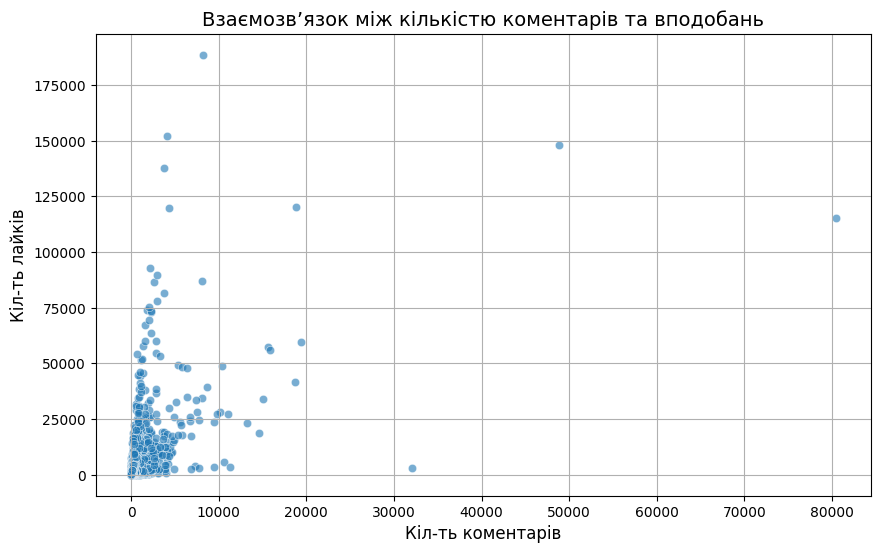

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cl_like_comments, x='comments_count', y='likes_count', alpha=0.6)
plt.title('Взаємозв’язок між кількістю коментарів та вподобань', fontsize=14)
plt.xlabel('Кіл-ть коментарів', fontsize=12)
plt.ylabel('Кіл-ть лайків', fontsize=12)
plt.grid(True);

**Висновок**

На точковій діаграмі спостерігається помірна позитивна кореляція між кількістю коментарів та кількістю вподобань. Це означає, що загалом публікації, які отримують більше коментарів, мають тенденцію отримувати й більше вподобань.

Однак важливо зазначити, що цей зв’язок не є абсолютним. Хоча загальна тенденція вказує на позитивну залежність, розкиданість точок свідчить про те, що на кількість вподобань можуть впливати й інші чинники, такі як якість контенту або розмір аудиторії.

Отже, хоча загальна картина є позитивною, цей зв’язок не є ідеальним, і деякі пости можуть суттєво відхилятися від загальної тенденції.

In [10]:
correlation = df_cl_like_comments['comments_count'].corr(df_cl_like_comments['likes_count'])
print(f"Коефіцієнт кореляції: {correlation:.2f}")

Коефіцієнт кореляції: 0.54


Помірна позитивна кореляція: Спостерігається тенденція, за якої збільшення кількості коментарів пов’язане з вищою кількістю вподобань. Проте цей зв’язок не є абсолютним: на кількість вподобань можуть впливати інші фактори, такі як якість контенту або аудиторія.

**Використовуючи логарифм від кількості коментарів та вподобань, зменшила вплив екстремальних значень і зробила зв’язок між змінними більш наочним. Це дозволяє краще зрозуміти загальні тенденції, не загубившись у великих числах.**

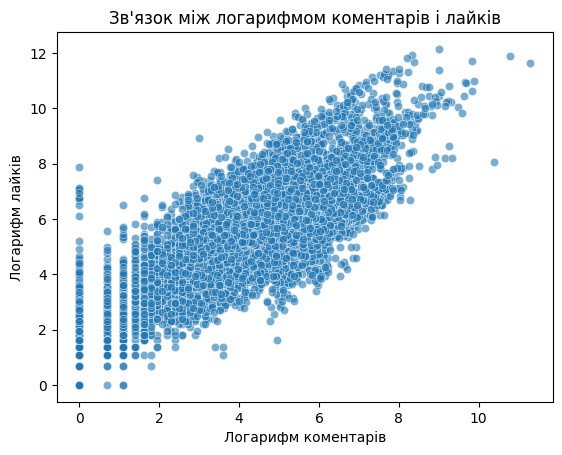

In [11]:
df_cl_like_comments = df_cl_like_comments.copy()

df_cl_like_comments.loc[:, 'log_comments'] = np.log1p(df_cl_like_comments['comments_count'])
df_cl_like_comments.loc[:, 'log_likes'] = np.log1p(df_cl_like_comments['likes_count'])

sns.scatterplot(data=df_cl_like_comments, x='log_comments', y='log_likes', alpha=0.6)
plt.title("Зв'язок між логарифмом коментарів і лайків")
plt.xlabel('Логарифм коментарів')
plt.ylabel('Логарифм лайків');


**Висновок**

Позитивна кореляція: Спостерігається тенденція позитивного зв’язку між кількістю коментарів і вподобань. Чим вищий логарифм кількості коментарів, тим вищим є логарифм кількості вподобань.


Розкиданість даних: Хоча загальна тенденція є позитивною, присутній певний розкид значень, особливо при низьких значеннях логарифма коментарів. Це може свідчити про вплив інших факторів, таких як якість контенту, актуальність теми тощо.


Логарифмічна шкала: Використання логарифмічної шкали зменшує вплив великих значень і краще демонструє загальну тенденцію.


Щільність точок: Вища щільність точок спостерігається при нижчих значеннях логарифмів коментарів і вподобань. Це може вказувати на те, що більшість контенту отримує невелику кількість коментарів і вподобань.


**Аналіз стовпця 'platform'**

Метою аналізу цього стовпця було розуміння розподілу та можливого впливу різних платформ і типів контенту на взаємодію користувачів (вподобання, коментарі, поширення тощо).


In [12]:
df['platform'].unique()

array(['Instagram', 'Leggi la descrizione per saperne di più+',
       'Argomenti da discutere nel gruppo', '1-Perdono',
       '2. Ama il prossimo', '3- Liberati dal peccato e pentiti',
       '4. Come seguire la volontà di Dio',
       'Il link del gruppo può essere trovato nel mio profilo.',
       '5 Il mistero del ritorno del Signore',
       '6 Come prepararsi al ritorno di Gesù', '7. Il piano di Dio',
       '8. Distinguere i veri cristi da quelli falsi',
       '9 Come Dio completa l’opera di giudizio',
       'Il link del gruppo può essere trovato nel mio profilo. Leggi le istruzioni+',
       '10. 10 citazioni sul matrimonio',
       '11. Parole sull’educazione dei bambini',
       '12-Parole sulla liberazione dalle tentazioni di Satana.',
       'Il clink del  gruppo può essere trovato nel mio profilo. Leggi le istruzioni+',
       '#preghiere', '#preghiamoinsieme', '#preghieraquotidiana',
       '#preghieradellasera', '#preghieradelcuore',
       '#preghieradelmattino', ' #

**Ми бачимо, що дані досить "брудні". Перевіримо, що зустрічається найчастіше.**

In [13]:
value_counts = df['platform'].value_counts()
print(value_counts)

platform
Instagram                                                                2500
YouTube                                                                  2500
Facebook                                                                 2500
TikTok                                                                   2500
#preghiere                                                                 26
                                                                         ... 
#basilicadisuperga                                                          1
#BasilicadiSantaMariaaPugliano #gesù #preghire                              1
#BasilicadiSanFrancesco                                                     1
#Chiesa                                                                     1
Unisciti al gruppo Whatsapp sulla mia home page per dirti la risposta       1
Name: count, Length: 79, dtype: int64


**Бачимо, що найчастіше зустрічаються Instagram, TikTok, Facebook та YouTube. Саме їх будемо детальніше досліджувати.**

In [14]:
valid_platforms = ['Instagram', 'TikTok', 'Facebook', 'YouTube']
df_filtered = df[df['platform'].isin(valid_platforms)]

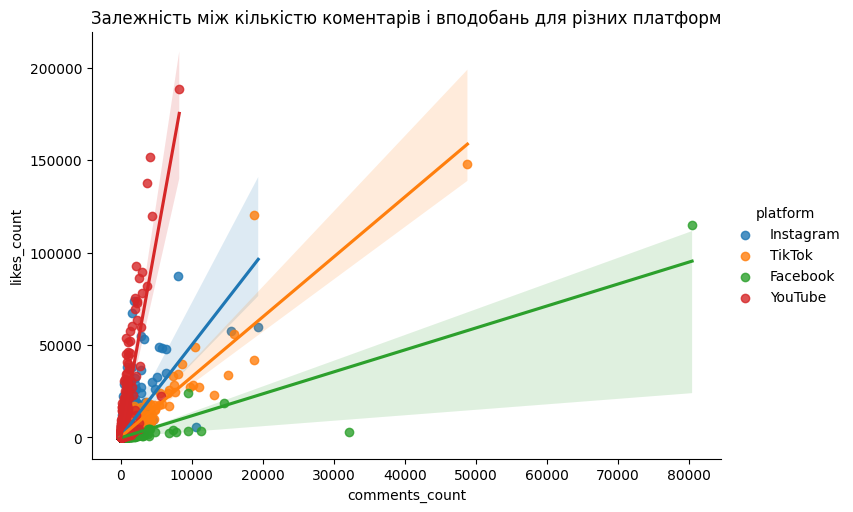

In [15]:
sns.lmplot(data=df_filtered, x='comments_count', y='likes_count', hue='platform', aspect=1.5)
plt.title('Залежність між кількістю коментарів і вподобань для різних платформ');

**Висновок**

Усі платформи демонструють позитивну кореляцію між кількістю коментарів і вподобань:

На YouTube помітно, що кількість вподобань суттєво зростає зі збільшенням кількості коментарів.

В Instagram ця тенденція також присутня, однак потрібно більше коментарів, щоб отримати велику кількість вподобань.

TikTok виглядає як золота середина — вподобання зростають плавно та рівномірно зі збільшенням кількості коментарів.

На Facebook ситуація відрізняється: навіть при великій кількості коментарів кількість вподобань залишається найнижчою. Це може свідчити про те, що користувачі більше схильні до обговорень, ніж до простого "лайкання" публікацій.

**Перетворила тип даних у стовпці created_time у формат дати, щоб мати змогу витягувати кориснішу інформацію для подальшого аналізу.**

In [16]:
df_filtered.loc[:, 'created_time'] = pd.to_datetime(df_filtered['created_time'], format='mixed', errors='coerce')

**We add new columns to analyze our data.**

In [17]:
df_filtered['created_time'] = pd.to_datetime(df_filtered['created_time'], format='mixed', errors='coerce')

df_filtered.loc[:, 'день тижня'] = df_filtered['created_time'].dt.dayofweek
df_filtered.loc[:, 'година'] = df_filtered['created_time'].dt.hour
df_filtered.loc[:, 'місяць'] = df_filtered['created_time'].dt.month


In [18]:
df_time_analysis = df_filtered.groupby(['година', 'день тижня']).agg(
    avg_likes=('likes_count', 'mean'),
    avg_comments=('comments_count', 'mean'),
    count_posts=('id', 'count')
).reset_index()


**Теплова карта вподобань за годинами та днями тижня**

Теплова карта — це візуальне представлення даних про взаємодію користувачів, де інтенсивність кольору відповідає концентрації певної дії, зокрема кількості вподобань, у певний час і в певний день тижня.

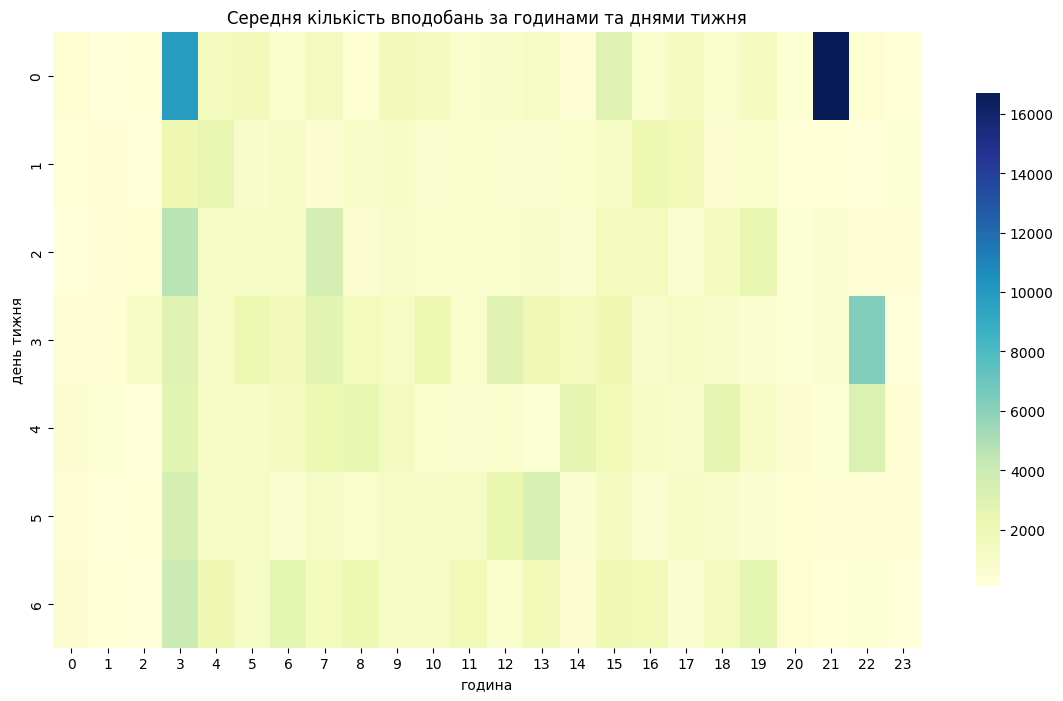

In [19]:
pivot_likes = df_time_analysis.pivot(index='день тижня', columns='година', values='avg_likes')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_likes, cmap="YlGnBu", annot=False, cbar_kws={'shrink': 0.8})
plt.title('Середня кількість вподобань за годинами та днями тижня');


**Висновок**

Найкращий час для публікацій, якщо мета — отримати максимальну кількість вподобань, — це неділя рано вранці або вночі. У робочі дні активність користувачів є більш рівномірною та нижчою, хоча спостерігаються піки зранку та у вечірній час.

**Теплова карта коментарів за годинами та днями тижня.**

Теплова карта — це візуальне представлення даних про взаємодію користувачів, де інтенсивність кольору відповідає концентрації певних дій користувачів на вашому вебсайті або в застосунку.

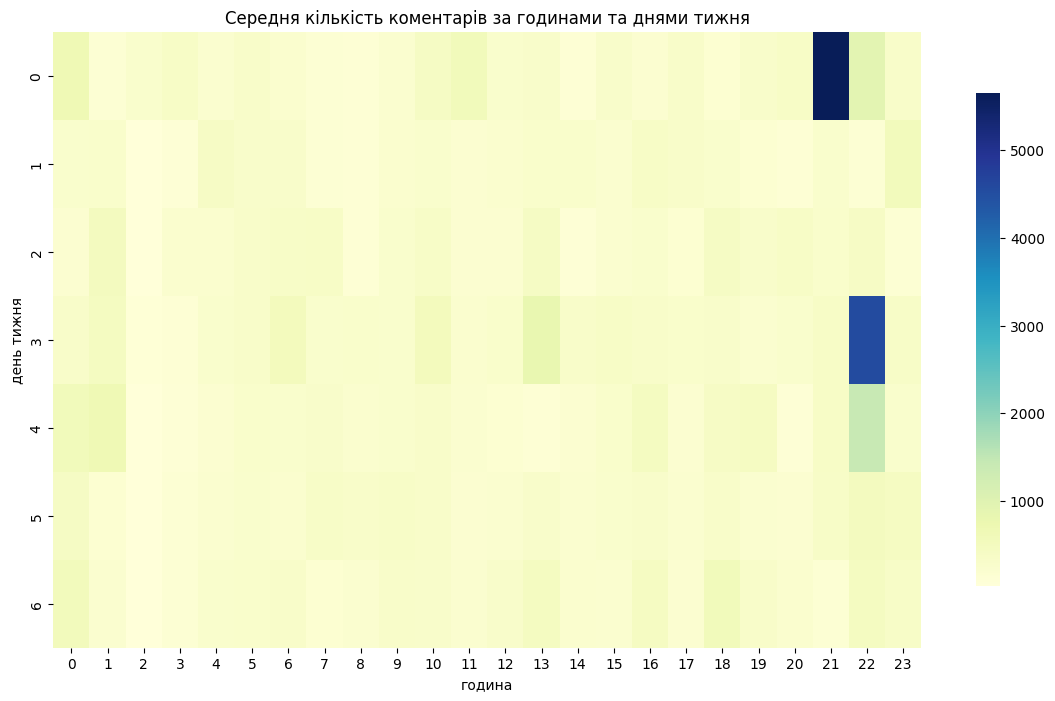

In [20]:
pivot_comments = df_time_analysis.pivot(index='день тижня', columns='година', values='avg_comments')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_comments, cmap="YlGnBu", annot=False, cbar_kws={'shrink': 0.8})
plt.title('Середня кількість коментарів за годинами та днями тижня');


**Висновок**

Найкращий час для публікацій, якщо мета — отримати максимальну кількість коментарів, — це ніч із неділі на понеділок або ніч середи.

In [21]:
df_platform_analysis = df_filtered.groupby(['platform']).agg(
    avg_likes=('likes_count', 'mean'),
    avg_comments=('comments_count', 'mean'),
    count_posts=('id', 'count')
).reset_index()

**Середня кількість вподобань на різних платформах.**

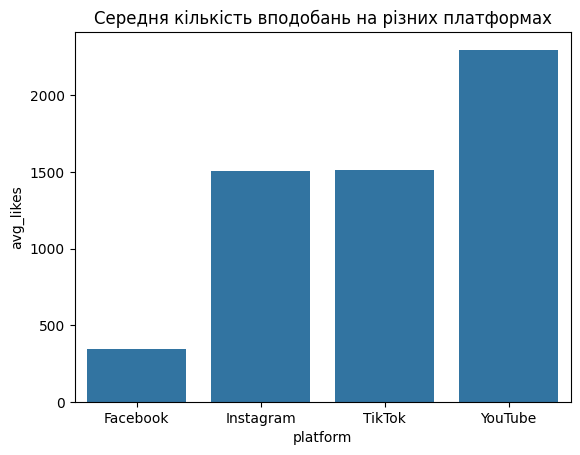

In [22]:
sns.barplot(x='platform', y='avg_likes', data=df_platform_analysis)
plt.title('Середня кількість вподобань на різних платформах');

**Висновок**

YouTube має найвищу середню кількість вподобань. Це може свідчити про високий рівень залучення користувачів на цій платформі, ймовірно, завдяки довшому формату відео, який дозволяє глибше взаємодіяти з контентом та довше утримує увагу глядача.

Facebook має найнижчу кількість вподобань. Це може вказувати на зниження активності користувачів, можливо, через зміну аудиторії, зміни в алгоритмах видимості публікацій або через інший характер контенту у порівнянні з іншими платформами.

Instagram і TikTok мають схожі середні значення. Це може свідчити про подібний рівень залучення, оскільки обидві платформи орієнтовані на короткий, динамічний контент (особливо TikTok), що стимулює певний рівень взаємодії.


Узагальнюючи, можна сказати, що YouTube демонструє високу активність, Facebook — зниження, тоді як Instagram і TikTok показують подібний рівень залучення користувачів, хоча й з різними підходами до контенту.

**Середня кількість коментарів на різних платформах**

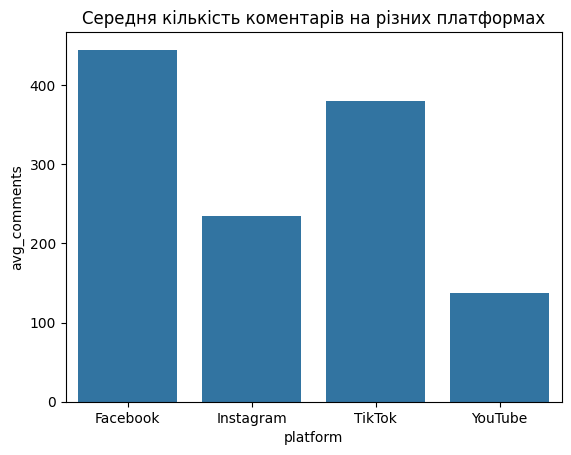

In [23]:
sns.barplot(x='platform', y='avg_comments', data=df_platform_analysis)
plt.title('Середня кількість коментарів на різних платформах');

**Висновок**

Facebook і TikTok — лідери за кількістю коментарів. Це свідчить про високий рівень залучення користувачів у дискусії. Ймовірно, це пов’язано з тим, що обидві платформи сприяють активній взаємодії через коментарі. У TikTok короткі та вірусні відео можуть спонукати до обговорень, а на Facebook — давня аудиторія та різноманітність форматів контенту сприяють комунікації.

Instagram — на наступному місці. Це вказує на помірний рівень взаємодії через коментарі. Хоч Instagram є інтерактивною платформою, він більше орієнтований на візуальний контент, а не на письмову комунікацію, як у випадку Facebook або TikTok.

YouTube має найменшу кількість коментарів. Незважаючи на високу кількість вподобань, кількість коментарів нижча. Це може пояснюватися тим, що користувачі здебільшого взаємодіють через перегляди та вподобання, а не через коментування. Також, формат довгих відео на YouTube може знижувати частоту коментарів у порівнянні з коротким контентом на TikTok чи Facebook.

У підсумку, Facebook і TikTok демонструють високу активність коментування, Instagram — помірну, а YouTube — нижчу, що відображає відмінності у форматах контенту та стилях взаємодії користувачів на кожній з платформ.

**У нас також є цікаві стовпці, такі як shares_count та views_count, які ми можемо дослідити більш детально.**

Матриця кореляцій (Correlation Matrix)

Матриця кореляцій — це таблиця, яка показує ступінь взаємозв’язку (кореляції) між кількома змінними (параметрами). Кожне значення в матриці відображає коефіцієнт кореляції між парою змінних і знаходиться в діапазоні від -1 до 1:

**+1** — ідеальна пряма (позитивна) кореляція: обидві змінні зростають разом.

**0** — відсутність кореляції: змінні не мають лінійного зв’язку.

**-1** — ідеальна зворотна (негативна) кореляція: одна змінна зростає, інша зменшується.

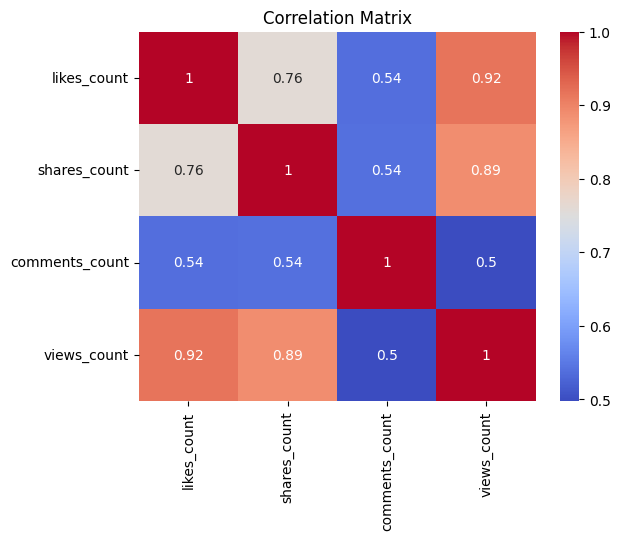

In [24]:
correlation_matrix = df_filtered[['likes_count', 'shares_count', 'comments_count', 'views_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix");

**Висновок**

Перегляди мають найсильніший кореляційний зв’язок із вподобаннями та поширеннями. Це логічно, оскільки більша кількість переглядів зазвичай призводить до більшої взаємодії.

Натомість коментарі демонструють слабший зв’язок з іншими показниками, що може свідчити про іншу мотивацію користувачів до коментування або про те, що на кількість коментарів впливають інші фактори, наприклад, емоційність контенту, тема чи заклики до обговорення.

**Тенденції за місяцями**

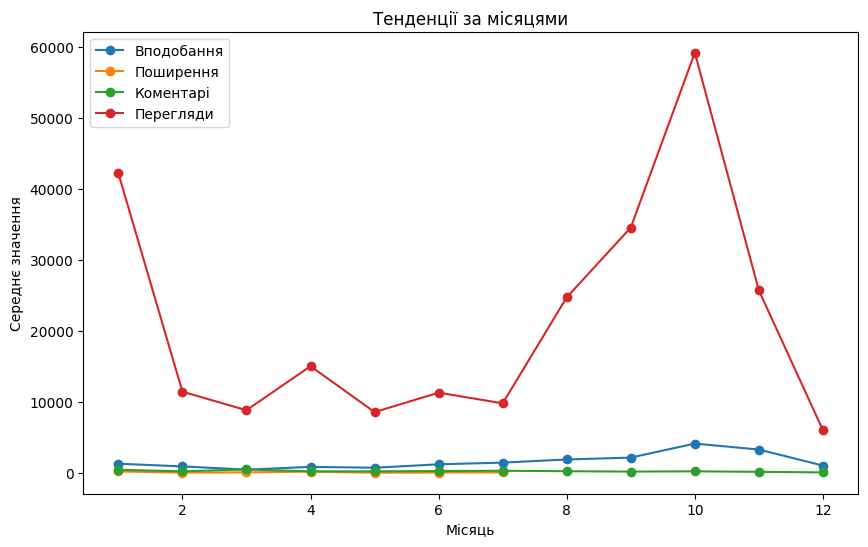

In [25]:
monthly_trend = df_filtered.groupby('місяць').agg({'likes_count': 'mean', 'shares_count': 'mean', 'comments_count': 'mean', 'views_count': 'mean'})
monthly_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Тенденції за місяцями")
plt.ylabel("Середнє значення")
plt.xlabel("Місяць")
plt.legend(["Вподобання", "Поширення", "Коментарі", "Перегляди"]);


**Висновок
З аналізу видно, що середні значення починають зростати з липня та досягають піку в листопаді, після чого спостерігається спад. Водночас у січні відбувається невелике підвищення активності.

Цікаво, що метрика поширень (shares) чітко присутня з липня по листопад, тобто під час нетрендових місяців, а потім лінія зникає, що може свідчити про зміну трендів або активності аудиторії на платформах.

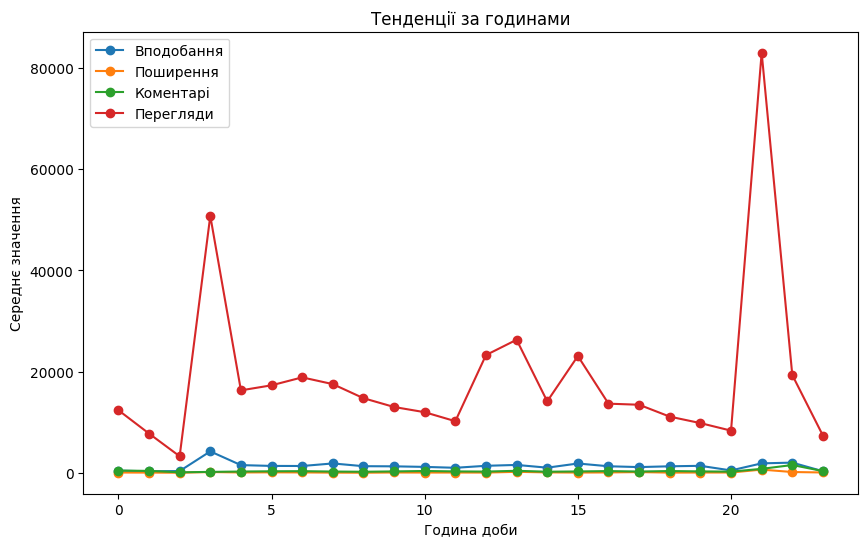

In [26]:
hourly_trend = df_filtered.groupby('година').agg({'likes_count': 'mean', 'shares_count': 'mean', 'comments_count': 'mean', 'views_count': 'mean'})
hourly_trend.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Тенденції за годинами")
plt.ylabel("Середнє значення")
plt.xlabel("Година доби")
plt.legend(["Вподобання", "Поширення", "Коментарі", "Перегляди"]);

**Висновок**

Аналіз показує активність користувачів о 2:00 та 4:00 ранку, що можна пояснити глобальним охопленням соціальних мереж, оскільки ними користуються люди з усього світу. Також спостерігається прогнозована активність між 20:00 та 22:00, що, ймовірно, відповідає вечірньому піку взаємодії. Крім того, середній рівень активності фіксується з 11:00 до 16:00, що, найімовірніше, пов’язано з пізнім ранком і обідньою порою в багатьох регіонах.

# Побудова моделі (лінійна регресійна модель, навчання, оцінка точності)

Модель прогнозує likes_count за: comments_count, views_count

**Підготовка ознак та цільової змінної** — це етап, на
якому визначила, які змінні використовуватимуться для побудови моделі:

*  Ознаки **(X, features)** – це змінні, які ви використовуєте для прогнозування результату. У моєму випадку, я використала такі ознаки:
comments_count (кількість коментарів)
views_count (кількість переглядів)

*  Цільова змінна **(y, target)** – це змінна, яку модель має прогнозувати. У моєму випадку це:
likes_count (кількість вподобань).

In [27]:
df_filtered = df_filtered.dropna(subset=['likes_count', 'comments_count', 'views_count'])

In [28]:
X = df_filtered[['comments_count', 'views_count']]
y = df_filtered['likes_count']

**Розбиття на тренувальну та тестову вибірки.**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Створює об'єкт моделі лінійної регресії та навчає її на X_train і y_train.**

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Застосовує модель до тестових даних, щоби передбачити лайки (likes_count).**

In [31]:
y_pred = model.predict(X_test)

**Оцінює якість моделі:**

**mse** – середньоквадратична помилка (чим менше, тим краще),

**r2** – коефіцієнт детермінації, що показує, наскільки добре модель пояснює дані (чим ближче до 1 — тим краще).

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
(model.coef_, model.intercept_, mse, r2)

(array([0.43514255, 0.06109449]),
 np.float64(536.1381243343849),
 10945746.955754915,
 0.7959280239330527)

*  coef_: коефіцієнти при comments_count та views_count — вплив кожної ознаки на лайки,
*  intercept_: початкове значення лайків, якщо інші = 0,
*  mse: помилка моделі,
*  r2: точність пояснення.


Результати:

**+1 коментар** ≈ +0.43 лайків

**+1 перегляд** ≈ +0.06 лайків

**Базовий рівень** ≈ 536 лайків (навіть без переглядів і коментарів)

**Середня помилка** = 11 млн лайків — велике значення, але:
RMSE ≈ 3300 лайків, тобто середня похибка у передбаченні ~3300 лайків (через великі числа в likes_count)

**R²** = 0.79 → модель добре пояснює 79% варіації лайків

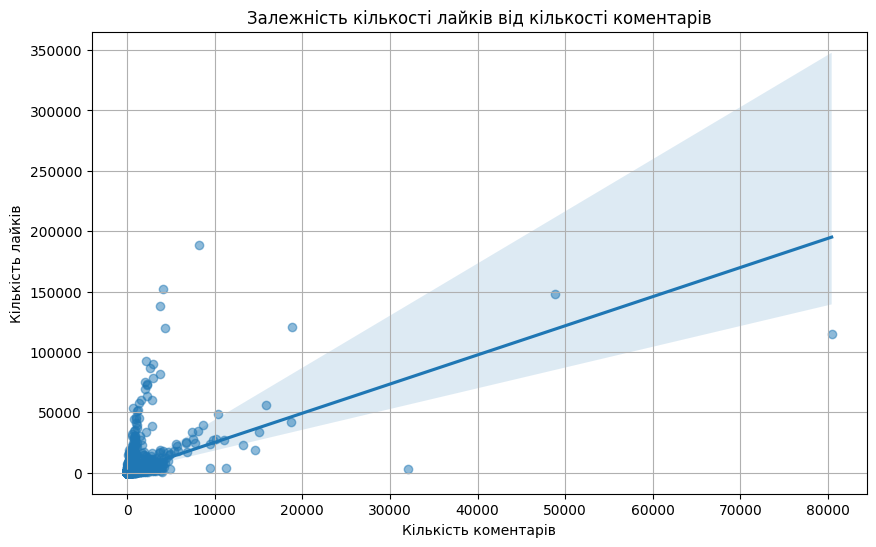

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='comments_count', y='likes_count', scatter_kws={'alpha':0.5})
plt.title('Залежність кількості лайків від кількості коментарів')
plt.xlabel('Кількість коментарів')
plt.ylabel('Кількість лайків')
plt.grid(True)

Висновок:

Коментарі мають кореляцію з лайками, але є окремі викиди.
Лінія регресії показує тенденцію, а світла зона — рівень впевненості.

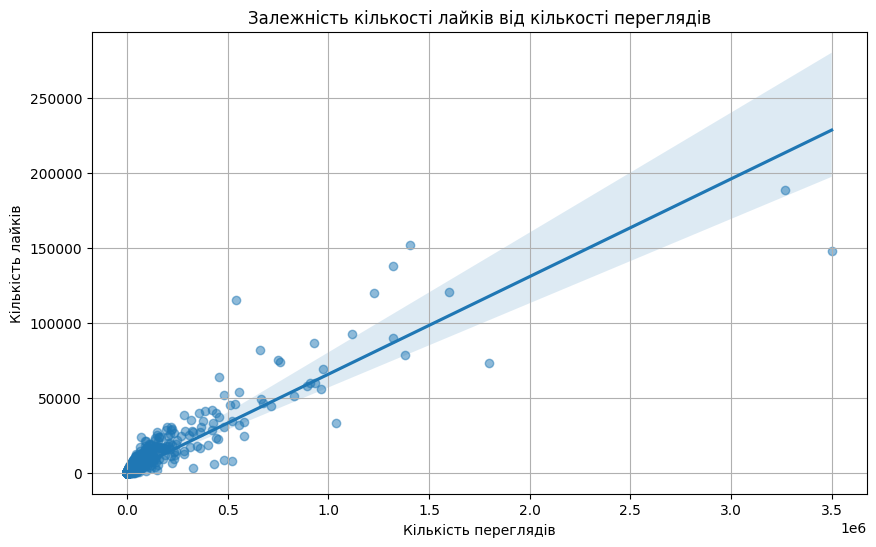

In [35]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='views_count', y='likes_count', scatter_kws={'alpha':0.5})
plt.title('Залежність кількості лайків від кількості переглядів')
plt.xlabel('Кількість переглядів')
plt.ylabel('Кількість лайків')
plt.grid(True);

**Висновок**

Є позитивна залежність (більше переглядів → більше лайків)
Є викиди з дуже великою кількістю переглядів і лайків.

Лінія регресії показує тенденцію, а світла зона — рівень впевненості.

**Загальний висновок:**


Модель працює добре та стабільно. Вона пояснює більшість варіації у даних (R² ≈ 0.79), а вплив основних ознак логічно обґрунтований.

Можна сміливо використовувати як базову модель для прогнозування активності постів у соцмережах.

# **Загальний висновок**
Аналіз показав, що взаємодія з контентом відрізняється на кожній платформі. Наприклад, YouTube має велику кількість вподобань, але мало коментарів, тоді як на Facebook користувачі частіше коментують, ніж ставлять вподобання. Instagram і TikTok мають схожий рівень активності, але підходи до контенту різняться.

Щодо часу публікацій, то найбільше вподобань отримують пости, опубліковані в неділю вранці або вночі, а найбільше коментарів — у вечірній час неділі та середи. Пік активності спостерігається з липня по листопад, після чого активність знижується до січня, але в січні помітне невелике зростання.

Узагальнюючи, можна сказати, що найбільше коментарів — на Facebook та TikTok, а найбільше вподобань — на YouTube.